<a href="https://colab.research.google.com/github/fabiobaroliveira/gerador_base_de_dados/blob/main/vendas_veiculos_seminovos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Necessário instalar biblioteca Faker
! pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import random
from faker import Faker
fake = Faker('pt_BR')

# Listas de valores possíveis
marcas_modelos = {
    "Fiat" : [ "Mobi","Argo", "Cronos", "500e", "Pulse", "Fastback", "Strada", "Toro", "Fiorino"],
    "Volskwagen" : [ "Up", "Gol", "Voyage", "Saveiro", "Polo", "Virtus", "Nivus", "T-Cross", "Amarok"],
    "Chevrolet" : [ "Onix", "Prisma", "Cruze", "Tracker", "S-10", "TrailBlazer"],
    "Hyundai" : [ "HB20", "HB20S", "Creta", "Tucson"],
    "Honda" : [ "Civic", "HR-V", "City", "Fit", "CR-V"],
    "Toyota" : [ "Etios","Yaris","Corolla", "Camry", "Corolla Cross", "Hilux"],
    "Ford" : [ "Ka", "Ka Sedan", "Ecosport", "Ranger", "Focus", "Territory"],
    "Peugeot" : [ "208" , "308", "2008", "3008", "Partner"],
    "Citroen" : [ "C3", "Aircross", "C4", "C4 Grand Picasso", "Basalt"],
    "Jeep" : [ "Compass", "Renegade", "Wrangler", "Cherokee"]
}

formas_pagamento = ["À vista", "Financiamento", "Consórcio", "Leasing"]
cores = ["Preto", "Branco", "Prata", "Vermelho", "Azul", "Verde", "Cinza"]
sexo_opcoes = ["Masculino", "Feminino"]

# Função para gerar pesos aleatórios
def gerar_pesos_aleatorios(n):
    pesos = [random.randint(1, 100) for _ in range(n)]  # Gera n pesos aleatórios
    total = sum(pesos)  # Calcula a soma dos pesos
    pesos = [round((p / total) * 100, 2) for p in pesos]  # Normaliza para somar 100
    return pesos

# Gerando pesos aleatórios para marcas
marcas = list(marcas_modelos.keys())
pesos_marcas = gerar_pesos_aleatorios(len(marcas))

# Gerando pesos aleatórios para formas de pagamento
pesos_formas_pagamento = gerar_pesos_aleatorios(len(formas_pagamento))

# Gerando pesos aleatórios para cores
pesos_cores = gerar_pesos_aleatorios(len(cores))

# Gerando pesos aleatórios para sexo
pesos_sexo = gerar_pesos_aleatorios(len(sexo_opcoes))

# Gerando os dados fictícios
dados = []

for i in range(1, 10951):
    sexo = random.choices(sexo_opcoes, weights=pesos_sexo, k=1)[0]
    nome = fake.first_name_male() if sexo == "Masculino" else fake.first_name_female()
    sobrenome = fake.last_name()
    nome_completo = f"{nome} {sobrenome}"
    idade = random.randint(18, 70)
    cpf = fake.cpf()
    estado_civil = fake.random_element(elements=('Solteiro', 'Casado', 'Divorciado', 'Viúvo'))
    email = fake.email()
    telefone = fake.phone_number()
    cidade = fake.city()
    estado = fake.state_abbr()

    # Escolha da marca com base nos pesos aleatórios
    marca = random.choices(marcas, weights=pesos_marcas, k=1)[0]
    modelo = random.choice(marcas_modelos[marca])

    ano_fabricacao = random.randint(2013, 2023)
    cor = random.choices(cores, weights=pesos_cores, k=1)[0]
    valor_venda = round(random.uniform(30000, 250000), 2)
    data_venda = fake.date_between(start_date="-8y", end_date="today")
    forma_pagamento = random.choices(formas_pagamento, weights=pesos_formas_pagamento, k=1)[0]

    dados.append([
        i, nome_completo, idade, cpf, sexo, estado_civil, email, telefone, cidade, estado,
        marca, modelo, ano_fabricacao, cor, valor_venda, data_venda, forma_pagamento
    ])

# Criando o DataFrame
colunas = ["ID", "Nome Completo", "Idade", "CPF", "Sexo", "Estado Civil", "E-mail",
           "Telefone", "Cidade", "Estado", "Marca", "Modelo", "Ano_fabricacao",
           "Cor", "Valor_venda", "Data_venda", "Forma_pagamento"]

df_vendas = pd.DataFrame(dados, columns=colunas)

# Exibindo as primeiras linhas do DataFrame
df_vendas.head()

,ID,Nome Completo,Idade,CPF,Sexo,Estado Civil,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento
0,1,Luigi Silva,53,910.623.485-24,Masculino,Viúvo,monteirovalentim@example.org,+55 21 0592 1284,Azevedo de da Rosa,SP,Toyota,Yaris,2021,Cinza,80028.52,2017-08-31,À vista
1,2,Ester da Rocha,63,235.408.196-06,Feminino,Solteiro,santoshenry@example.net,(084) 2407 2800,Costela,PR,Hyundai,HB20S,2016,Cinza,103668.13,2022-01-01,Consórcio
2,3,Maria Luiza Nogueira,25,174.950.328-04,Feminino,Solteiro,zgoncalves@example.net,+55 81 2567 8847,Sá Alegre,MG,Ford,Ecosport,2017,Preto,229867.69,2018-02-17,À vista
3,4,Renan Novaes,19,245.367.890-65,Masculino,Casado,oliver50@example.com,+55 (021) 0411 4291,Guerra,MA,Honda,Fit,2020,Cinza,105843.27,2024-02-03,Financiamento
4,5,Manuela Novais,40,371.269.084-31,Feminino,Casado,tpinto@example.org,(011) 8890 3785,Castro de Minas,PI,Ford,Ka,2022,Cinza,66929.84,2019-06-29,Financiamento


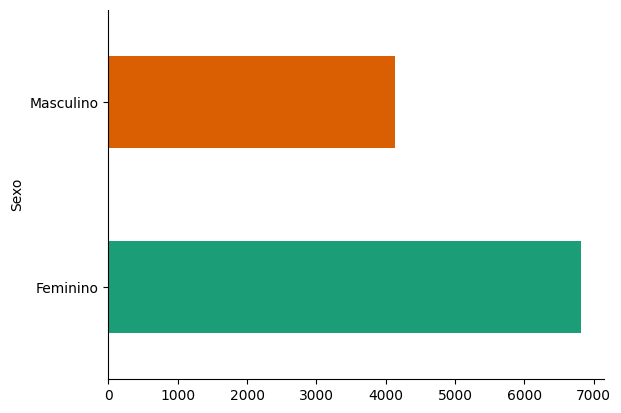

In [4]:
# @title Gráfico para Vizualização de Divisão por Sexo

from matplotlib import pyplot as plt
import seaborn as sns

df_vendas.groupby("Sexo").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))

plt.gca().spines[["top", "right",]].set_visible(False)

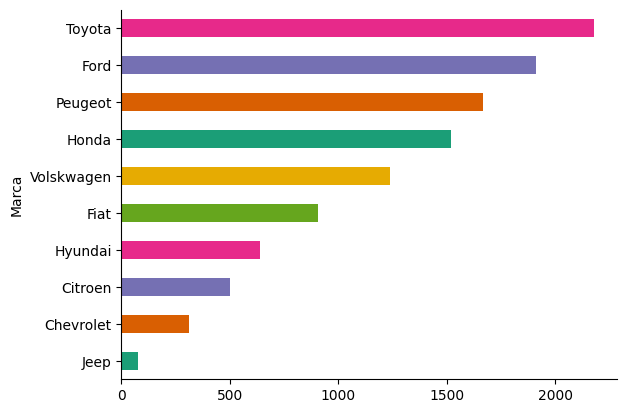

In [5]:
# @title Gráfico para Vizualização de Divisão de Vendas por Marca

from matplotlib import pyplot as plt
import seaborn as sns

# Coloca em ordem crescente
(df_vendas.groupby("Marca").size().sort_values().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2")))

# Remove bordas desnecessárias
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
from google.colab import files

# Cria arquivos .csv com o separador ;
df_vendas.to_csv('vendas_loja_seminovos.csv', index=False, sep=';')

# Faz o download dos arquivos
files.download('vendas_loja_seminovos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>